In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

In [3]:
df = pd.read_csv("SMSSpamCollection.txt", sep="\t", header=None,  names=["label", "Content"])

In [4]:
df.head()

,label,Content
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [5]:
df.shape

(5572, 2)

### DATA PREPROCESSING 
* data cleaning
* eliminate stop words
* reduce size of the document using stemming or lemmatization

**CLEANING**
* Removing punctuation marks

In [6]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
def Remove_Punctuation(text):
    result = "".join([ch for ch in text if ch not in string.punctuation])
    return result

In [7]:
df['Content_clean'] = df['Content'].apply(lambda x : Remove_Punctuation(x))

In [8]:
df.head()

,label,Content,Content_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


* Removing Stop Words

In [8]:
import re
def Tokenizer(text):
    words = re.split('\W+', text)
    return words

In [19]:
df['Content_tokenized'] = df['Content_clean'].apply(lambda x : Tokenizer(x.lower()))

In [20]:
df.head()

,label,Content,Content_clean,Content_tokenized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
en_stopword = nltk.corpus.stopwords.words('english')
en_stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
def Remove_Stopwords(content_list):
    result = [word for word in content_list if word not in en_stopword]
    return result

In [23]:
df['Content_without_Stopwords'] = df['Content_tokenized'].apply(lambda x: Remove_Stopwords(x))

In [42]:
df.head()

,label,Content,Content_clean,Content_tokenized,Content_without_Stopwords
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


* Stemming

In [11]:
ps = nltk.PorterStemmer()

In [12]:
def stemming(words):
    result = [ps.stem(word) for word in words]
    return result

In [26]:
df['Content_Stemmed'] = df['Content_without_Stopwords'].apply(lambda x : stemming(x))

In [27]:
df.head()

,label,Content,Content_clean,Content_tokenized,Content_without_Stopwords,Content_Stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"


* Lemmatization

In [13]:
wn = nltk.WordNetLemmatizer()

In [29]:
def lemmatizing(words):
    result = [wn.lemmatize(word) for word in words]
    return result

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
df['Content_Lemmatized'] = df['Content_without_Stopwords'].apply(lambda x : lemmatizing(x))

In [32]:
df.head()

,label,Content,Content_clean,Content_tokenized,Content_without_Stopwords,Content_Stemmed,Content_Lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"


In [36]:
df.drop(['Content_tokenized','Content_without_Stopwords','Content_clean'],axis=1,inplace=True)

## Vectorisation


In [9]:
df.head()

,label,Content
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


### Methode : Count Vectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import re
ps = nltk.PorterStemmer()

In [15]:
def clean_email(email):
    result = "".join([word for word in email if word not in string.punctuation])
    tokens = re.split('\W+', result)
    final_result = [ps.stem(word) for word in tokens if word not in en_stopword]
    return final_result

In [16]:
vectorisation_full = CountVectorizer(analyzer=clean_email)
vect_final = vectorisation_full.fit_transform(df['Content'])

In [18]:
vect_final.shape

(5572, 8193)

### Methode :  N-Grams

In [20]:
df.head()

,label,Content
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [24]:
def clean_email(email):
    result = "".join([word for word in email if word not in string.punctuation])
    tokens = re.split('\W+', result)
    final_result = " ".join([ps.stem(word) for word in tokens if word not in en_stopword])
    return final_result

In [25]:
df['Content_Stemed'] = df['Content'].apply(lambda x : clean_email(x))

In [26]:
df.head()

,label,Content,Content_Stemed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think goe usf live around though


In [31]:
ngram_vectorisation = CountVectorizer(ngram_range=(2,2))
vecteur_final = ngram_vectorisation.fit_transform(df['Content_Stemed'])

In [29]:
vecteur_final.shape

(5572, 34162)

In [34]:
data0 = df[0:5]
ngram_vectorisation0 = CountVectorizer(ngram_range=(2,2))
vecteur_final0 = ngram_vectorisation0.fit_transform(data0['Content_Stemed'])

In [35]:
vecteur_final0.shape

(5, 50)

In [36]:
ngram_vectorisation0.get_feature_names()

['2005 text',
 '21st may',
 '87121 receiv',
 'alreadi say',
 'amor wat',
 'appli 08452810075over18',
 'around though',
 'avail bugi',
 'buffet cine',
 'bugi great',
 'cine got',
 'comp win',
 'crazi avail',
 'cup final',
 'dont think',
 'dun say',
 'earli hor',
 'entri questionstd',
 'entri wkli',
 'fa 87121',
 'fa cup',
 'final tkt',
 'free entri',
 'go jurong',
 'goe usf',
 'got amor',
 'great world',
 'hor alreadi',
 'joke wif',
 'jurong point',
 'la buffet',
 'lar joke',
 'live around',
 'may 2005',
 'nah dont',
 'ok lar',
 'point crazi',
 'questionstd txt',
 'ratetc appli',
 'receiv entri',
 'say earli',
 'text fa',
 'think goe',
 'tkt 21st',
 'txt ratetc',
 'usf live',
 'wif oni',
 'win fa',
 'wkli comp',
 'world la']

In [37]:
df_vect = pd.DataFrame(vecteur_final0.toarray())
df_vect.columns = ngram_vectorisation0.get_feature_names()

In [38]:
df_vect.head()

,2005 text,21st may,87121 receiv,alreadi say,amor wat,appli 08452810075over18,around though,avail bugi,buffet cine,bugi great,...,say earli,text fa,think goe,tkt 21st,txt ratetc,usf live,wif oni,win fa,wkli comp,world la
0,0,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,1,0,0,1,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


## Vectoriation TF-IDF

In [39]:
df

,label,Content,Content_Stemed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think goe usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...,thi 2nd time tri 2 contact u u 750 pound prize 2 claim easi call 087187272008 now1 onli 10p per ...
5568,ham,Will ü b going to esplanade fr home?,will ü b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",piti mood soani suggest
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,the guy bitch i act like id interest buy someth els next week gave us free


In [40]:
def clean_email(email):
    result = "".join([word for word in email if word not in string.punctuation])
    tokens = re.split('\W+', result)
    final_result = [ps.stem(word) for word in tokens if word not in en_stopword]
    return final_result

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfidf_vectorisation = TfidfVectorizer(analyzer=clean_email)
tfidf_final = tfidf_vectorisation.fit_transform(df['Content'])

In [48]:
tfidf_final.shape

(5572, 8193)

In [52]:
data0 = df[0:5]
tfidf_vectorisation0 = TfidfVectorizer(analyzer=clean_email)
tfidf_final0 = tfidf_vectorisation0.fit_transform(data0['Content'])

In [53]:
tfidf_final0.shape

(5, 58)

In [54]:
tfidf_vectorisation0.get_feature_names()

['08452810075over18',
 '2',
 '2005',
 '21st',
 '87121',
 'alreadi',
 'amor',
 'appli',
 'around',
 'avail',
 'buffet',
 'bugi',
 'c',
 'cine',
 'comp',
 'crazi',
 'cup',
 'dont',
 'dun',
 'e',
 'earli',
 'entri',
 'fa',
 'final',
 'free',
 'go',
 'goe',
 'got',
 'great',
 'hor',
 'i',
 'joke',
 'jurong',
 'la',
 'lar',
 'live',
 'may',
 'n',
 'nah',
 'ok',
 'oni',
 'point',
 'questionstd',
 'ratetc',
 'receiv',
 'say',
 'text',
 'think',
 'though',
 'tkt',
 'txt',
 'u',
 'usf',
 'wat',
 'wif',
 'win',
 'wkli',
 'world']

In [55]:
df_tdidf = pd.DataFrame(tfidf_final0.toarray())
df_tdidf.columns = tfidf_vectorisation0.get_feature_names()

In [56]:
df_tdidf.head()

,08452810075over18,2,2005,21st,87121,alreadi,amor,appli,around,avail,...,though,tkt,txt,u,usf,wat,wif,win,wkli,world
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.25,0.00000,0.000000,0.25,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.25,0.000000,0.00000,0.00000,0.25
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00,0.00000,0.000000,0.00,...,0.000000,0.00000,0.00000,0.339393,0.000000,0.00,0.420669,0.00000,0.00000,0.00
2,0.19245,0.19245,0.19245,0.19245,0.19245,0.000000,0.00,0.19245,0.000000,0.00,...,0.000000,0.19245,0.19245,0.000000,0.000000,0.00,0.000000,0.19245,0.19245,0.00
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.293564,0.00,0.00000,0.000000,0.00,...,0.000000,0.00000,0.00000,0.473691,0.000000,0.00,0.000000,0.00000,0.00000,0.00
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00,0.00000,0.333333,0.00,...,0.333333,0.00000,0.00000,0.000000,0.333333,0.00,0.000000,0.00000,0.00000,0.00


**Feature engineering**
* Adding new variables
* transform the existant variables

## Adding new variables for the SPAM MODEL
* rate of punctuation marks
* Message size
* rate uppercase letters
* in spam we will se never words like 'lol' so we can create boolean if lol is present

In [14]:
data = df.copy()

In [15]:
data['Content_len'] = data['Content'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,Content,Content_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives around here though",49


In [18]:
import string 
def count_punctuation(text):
    binary_array = [1 for ch in text if ch in string.punctuation]
    nb_punctuation = sum(binary_array)
    total = len(text) - text.count(" ")
    return round(nb_punctuation/(total), 4)*100 

In [19]:
data['punctuation_rate'] = data['Content'].apply(lambda x : count_punctuation(x))

In [20]:
data.head()

,label,Content,Content_len,punctuation_rate
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92,9.78
1,ham,Ok lar... Joking wif u oni...,24,25.00
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.69
3,ham,U dun say so early hor... U c already then say...,39,15.38
4,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.08


In [29]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

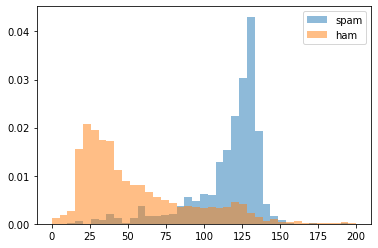

In [31]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label']=='spam']['Content_len'], bins, alpha=0.5, density=True, stacked=True, label='spam')
pyplot.hist(data[data['label']=='ham']['Content_len'], bins, alpha=0.5, density=True, stacked=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

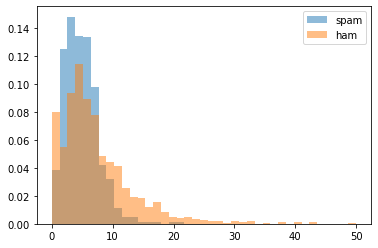

In [32]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label']=='spam']['punctuation_rate'], bins, alpha=0.5, density=True, stacked=True, label='spam')
pyplot.hist(data[data['label']=='ham']['punctuation_rate'], bins, alpha=0.5, density=True, stacked=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

## Cross Validation